# "Safest" Neighborhoods in Pittsburgh

## Police Arrest Data
#### Notebook by Dylan Dimond
Data URL: https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f

# Creating the dataset

In [1]:
#imports
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from itertools import islice
from collections import defaultdict

In [2]:
#reading the dataset
data = pd.read_csv("ArrestData.csv", index_col="_id", parse_dates=True)
data.head(100)

/var/folders/ht/j1dq2fn93rv7h9jtmt6g310h0000gn/T/ipykernel_176/504821012.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("ArrestData.csv", index_col="_id", parse_dates=True)


PK       CCR   AGE GENDER RACE           ARRESTTIME  \
_id                                                             
1    1975272  16158872  42.0      F    B  2016-08-24T12:20:00   
2    1974456  16144120  31.0      M    W  2016-08-03T14:55:00   
3    1974466  16144165  63.0      F    B  2016-08-03T16:45:00   
4    1974550  16145257  25.0      F    W  2016-08-05T02:36:00   
5    1974596  16145962  25.0      M    B  2016-08-06T02:00:00   
..       ...       ...   ...    ...  ...                  ...   
96   1975358  16162854  35.0      M    B  2016-08-29T23:33:00   
97   1974535  16145596  25.0      F    B  2016-08-05T15:26:00   
98   1974941  16155030  34.0      M    W  2016-08-18T22:46:00   
99   1974954  16091081  20.0      M    B  2016-09-07T01:30:00   
100  1974940  16154303  27.0      M    W  2016-08-17T22:28:00   

                                       ARRESTLOCATION  \
_id                                                     
1           4700 Block Centre AV Pittsburgh, PA 15213   
2    4200 Block Steubenville PKE Pittsburgh, PA 15205   
3          900 Block Freeport RD Fox Chapel, PA 15238   
4         Foreland ST & Cedar AV Pittsburgh, PA 15212   
5           900 Block Woodlow ST Pittsburgh, PA 15205   
..                                                ...   
96         700 Block Brushton AV Pittsburgh, PA 15221   
97         5800 Block Forward AV Pittsburgh, PA 15217   
98        lamar ST & Williams RD Pittsburgh, PA 15212   
99              900 Block 2ND AV Pittsburgh, PA 15219   
100            900 Block Mina ST Pittsburgh, PA 15212   

                                              OFFENSES  \
_id                                                      
1                                   3929 Retail Theft.   
2         13(a)(16) Possession of Controlled Substance   
3                                   3929 Retail Theft.   
4    5503 Disorderly Conduct. / 5505 Public Drunken...   
5    2702 Aggravated Assault. / 2705 Recklessy Enda...   
..                                                 ...   
96   13(a)(16) Possession of Controlled Substance /...   
97   13(a)(16) Possession of Controlled Substance /...   
98        13(a)(16) Possession of Controlled Substance   
99   2706 Terroristic Threats. / 2701(a)(3) Simple ...   
100  2706 Terroristic Threats. / 5104 Resisting Arr...   

                                     INCIDENTLOCATION   INCIDENTNEIGHBORHOOD  \
_id                                                                            
1           4700 Block Centre AV Pittsburgh, PA 15213             Bloomfield   
2    4200 Block Steubenville PKE Pittsburgh, PA 15205           Outside City   
3          900 Block Freeport RD Fox Chapel, PA 15238               Westwood   
4         Foreland ST & Cedar AV Pittsburgh, PA 15212         East Allegheny   
5           900 Block Woodlow ST Pittsburgh, PA 15205        Crafton Heights   
..                                                ...                    ...   
96         700 Block Brushton AV Pittsburgh, PA 15221         Homewood South   
97         5800 Block Forward AV Pittsburgh, PA 15217    Squirrel Hill South   
98        lamar ST & Williams RD Pittsburgh, PA 15212      Northview Heights   
99          2600 Block Centre AV Pittsburgh, PA 15219        Terrace Village   
100            900 Block Mina ST Pittsburgh, PA 15212  Spring Hill-City View   

    INCIDENTZONE  INCIDENTTRACT  COUNCIL_DISTRICT  PUBLIC_WORKS_DIVISION  \
_id                                                                        
1              5          804.0               8.0                    2.0   
2            OSC         5599.0               NaN                    NaN   
3              5         2811.0               9.0                    2.0   
4              1         2304.0               1.0                    1.0   
5              5         2814.0               2.0                    5.0   
..           ...            ...               ...                    ...   
96             5  

In [3]:
#sorting the dataset by the values we want
df = pd.DataFrame(data)
neighborhoodData = df[['INCIDENTNEIGHBORHOOD', 'ARRESTTIME', 'OFFENSES']]
neighborhoodData.sort_values(by='INCIDENTNEIGHBORHOOD', inplace=True)
neighborhoodData


/var/folders/ht/j1dq2fn93rv7h9jtmt6g310h0000gn/T/ipykernel_176/3352043741.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighborhoodData.sort_values(by='INCIDENTNEIGHBORHOOD', inplace=True)


INCIDENTNEIGHBORHOOD           ARRESTTIME  \
_id                                               
15167     Allegheny Center  2017-11-22T13:45:00   
11159     Allegheny Center  2017-07-27T23:11:00   
1080      Allegheny Center  2016-09-06T18:12:00   
1081      Allegheny Center  2016-09-06T18:12:00   
11160     Allegheny Center  2017-07-27T23:11:00   
...                    ...                  ...   
34924                  NaN  2019-06-18T08:40:00   
34939                  NaN  2019-06-13T01:30:00   
34940                  NaN  2019-06-13T01:30:00   
34945                  NaN  2019-06-16T01:50:00   
34976                  NaN  2019-06-17T15:59:00   

                                                OFFENSES  
_id                                                       
15167  903 Criminal Conspiracy. / 13(a)(16) Possessio...  
11159  5101 Obstructing Admin. of Law  / 5104 Resisti...  
1080   3334 Turning Movements and Required Signals. /...  
1081   9501 Bench Warrant / 4914 False Identification...  
11160  5101 Obstructing Admin. of Law  / 5104 Resisti...  
...                                                  ...  
34924  2702 Aggravated Assault. / 2705 Recklessy Enda...  
34939                                5901 Open Lewdness.  
34940                                5901 Open Lewdness.  
34945       13(a)(31) Marijuana: Possession Small Amount  
34976  2705 Recklessy Endangering Another Person. / 3...  

[32000 rows x 3 columns]

In [4]:
#adding the offense and time to each neighborhood
incidentData = {}
incidentCount = {}

for index, row in neighborhoodData.iterrows():
    neighborhood = row['INCIDENTNEIGHBORHOOD']
    offenseTime = row['ARRESTTIME']
    offense = row['OFFENSES']

    if pd.isna(neighborhood) or pd.isna(offenseTime) or pd.isna(offense):
        continue

    offenseTime = pd.to_datetime(offenseTime, errors="coerce")
    if pd.isna(offenseTime):
        continue
    date = offenseTime.date()
    
    neighborhood = str(neighborhood)

    if neighborhood not in incidentCount:
        incidentData[neighborhood] = []
        incidentCount[neighborhood] = 0
   
    incidentData[neighborhood].append((date, offense))
    incidentCount[neighborhood] += 1

#printing the data
for neighborhood, count in sorted(incidentCount.items(), key=lambda x: -x[1]):
    print(f"{neighborhood}: {count} incidents")
    for date, offense in sorted(incidentData[neighborhood], key=lambda x: x[0]):
        print(f"   - Date: {date}, Offense: {offense}")
        

Central Business District: 1845 incidents
   - Date: 2014-11-28, Offense: 13(a)(31) Marijuana: Possession Small Amount
   - Date: 2016-03-03, Offense: 9015 Failure To Appear/Arrest on Attachment Order
   - Date: 2016-04-12, Offense: 3924 Theft of Property Lost, Mislaid or Delivered by Mistake.
   - Date: 2016-04-13, Offense: 2702 Aggravated Assault. / 5501 Riot.
   - Date: 2016-04-13, Offense: 2702 Aggravated Assault. / 5104 Resisting Arrest or Other Law Enforcement. / 5501 Riot.
   - Date: 2016-04-13, Offense: 2702 Aggravated Assault. / 5104 Resisting Arrest or Other Law Enforcement. / 5501 Riot.
   - Date: 2016-09-05, Offense: 5505 Public Drunkenness / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession
   - Date: 2016-09-05, Offense: 3921(a) Theft by Unlawful Taking or Disposition - Movable item
   - Date: 2016-09-12, Offense: 9015 Failure To Appear/Arrest on Attachment Order / 9501 Bench Warrant / 13(a)(31) Marijuana: Possession Small Amount
 

In [5]:
# further trimming the data to get only date and time
incidentCount = {}
incidentCountPerYear = defaultdict(lambda: defaultdict(int))

for index, row in neighborhoodData.iterrows():
    neighborhood = row['INCIDENTNEIGHBORHOOD']
    offenseTime = row['ARRESTTIME']

    offenseTime = pd.to_datetime(offenseTime, errors="coerce")
    if pd.isna(offenseTime):
        continue
    date = offenseTime.date()
    
    neighborhood = str(neighborhood)

    if neighborhood not in incidentCount:
        incidentCount[neighborhood] = 0
   
    incidentCount[neighborhood] += 1

    year = date.year
    incidentCountPerYear[neighborhood][year] += 1

print(incidentCountPerYear)
print(incidentCount)

defaultdict(<function <lambda> at 0x12ae59310>, {'Allegheny Center': defaultdict(<class 'int'>, {2017: 216, 2016: 82, 2018: 161, 2019: 80}), 'Allegheny West': defaultdict(<class 'int'>, {2016: 7, 2018: 20, 2017: 34, 2019: 8}), 'Allentown': defaultdict(<class 'int'>, {2018: 167, 2016: 64, 2017: 194, 2019: 56}), 'Arlington': defaultdict(<class 'int'>, {2018: 60, 2017: 50, 2016: 20, 2019: 21}), 'Arlington Heights': defaultdict(<class 'int'>, {2017: 21, 2019: 39, 2016: 13, 2018: 15}), 'Banksville': defaultdict(<class 'int'>, {2017: 44, 2018: 39, 2019: 15, 2016: 24}), 'Bedford Dwellings': defaultdict(<class 'int'>, {2017: 118, 2016: 32, 2018: 93, 2019: 47}), 'Beechview': defaultdict(<class 'int'>, {2018: 220, 2017: 252, 2016: 67, 2019: 77, 2015: 1}), 'Beltzhoover': defaultdict(<class 'int'>, {2016: 27, 2017: 123, 2018: 94, 2019: 35}), 'Bloomfield': defaultdict(<class 'int'>, {2018: 174, 2017: 177, 2016: 74, 2014: 1, 2019: 50}), 'Bluff': defaultdict(<class 'int'>, {2017: 320, 2018: 235, 2019

# Plotting the Data

### Top 10 neighborhoods with arrests

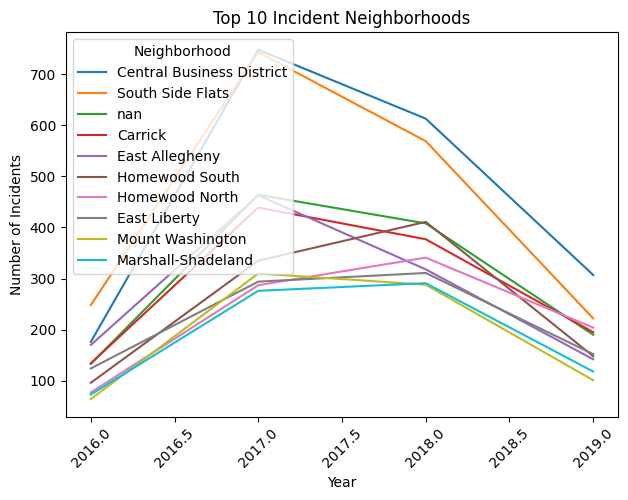

In [6]:
#plotting data of the top 10 number of incident neighborhoods
sortedNeighborhoods = sorted(incidentCountPerYear, key=lambda neighborhood: -incidentCount[neighborhood])

plottingData = []

for neighborhood in sortedNeighborhoods[:10]:
    year_counts = incidentCountPerYear[neighborhood]
    sortedYears = [year for year in sorted(year_counts) if year > 2015]
    counts = [year_counts[year] for year in sortedYears]
    plt.plot(sortedYears, counts, label=neighborhood)

plt.title("Top 10 Incident Neighborhoods")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend(title="Neighborhood", loc='upper left')
plt.grid(False)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


### Bottom 10 neighborhoods with arrests

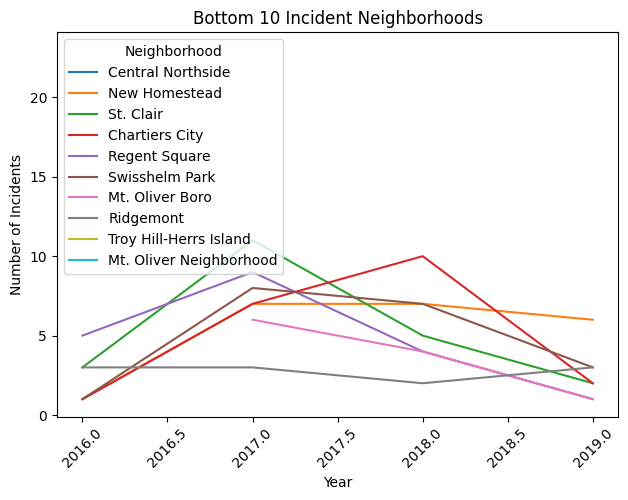

In [7]:
#plotting data of the bottom 10 number of incident neighborhoods
sortedNeighborhoods = sorted(incidentCountPerYear, key=lambda neighborhood: -incidentCount[neighborhood])

plottingData = []

for neighborhood in sortedNeighborhoods[-10:]:
    year_counts = incidentCountPerYear[neighborhood]
    sortedYears = [year for year in sorted(year_counts) if year > 2015]
    counts = [year_counts[year] for year in sortedYears]
    plt.plot(sortedYears, counts, label=neighborhood)

plt.title("Bottom 10 Incident Neighborhoods")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend(title="Neighborhood", loc='upper left')
plt.grid(False)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


### Top 5 neighborhoods with arrests, and bottom 5 combined

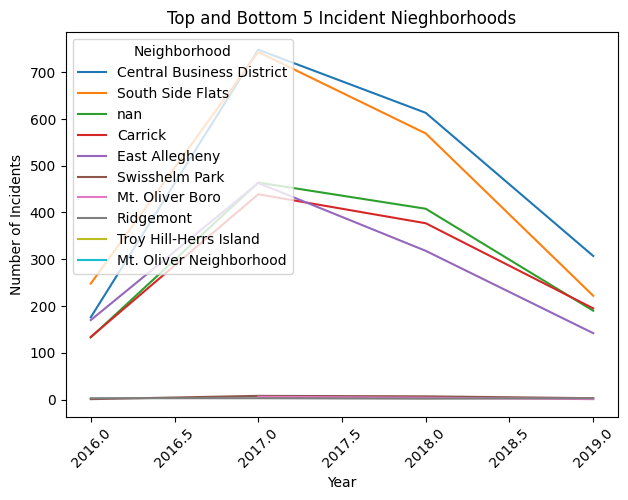

In [8]:
#plotting data of the 5 most incident counts and 5 least incident counts
sortedNeighborhoods = sorted(incidentCountPerYear, key=lambda neighborhood: -incidentCount[neighborhood])

plottingData = []

for neighborhood in sortedNeighborhoods[:5]:
    year_counts = incidentCountPerYear[neighborhood]
    sortedYears = [year for year in sorted(year_counts) if year > 2015]
    counts = [year_counts[year] for year in sortedYears]
    plt.plot(sortedYears, counts, label=neighborhood)

for neighborhood in sortedNeighborhoods[-5:]:
    year_counts = incidentCountPerYear[neighborhood]
    sortedYears = [year for year in sorted(year_counts) if year > 2015]
    counts = [year_counts[year] for year in sortedYears]
    plt.plot(sortedYears, counts, label=neighborhood)

plt.title("Top and Bottom 5 Incident Nieghborhoods")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend(title="Neighborhood", loc='best')
plt.grid(False)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


#### As we can see, there is a very striking difference between the top 5 neighborhoods and the bottom 5 neighborhoods of incident counts.
#### However, this data is not very representative - sure we can see that the bottom 5 neighborhoods have a lot less arrests, but how does that scale to the amount of people living there?
#### Let's find out.

# Finding Arrests per Capita
#### We will be using the 2020 Census data from this dataset: https://data.wprdc.org/dataset/2020-census-redistricting-data-extracts/resource/a8414ed5-c50f-417e-bb67-82b734660da6

#### For simplicity we will be using only the top and bottom 5 incident neighborhoods and comparing.
#### As most of this data is taken from 2016 - 2023, and the census was from 2023, so there may be some discpencies in data, but none significant enough for me to dive too deep.

## Top 5 Incident Neighborhoods
#### Note: Nan will not be included for obvious reasons
#### Central Business District
    4440 Incidents / 7 Years = 634 Arrests per Year
    634 / 5477 Total Pop = 0.116 Arrests per Person
     
#### South Side Flats
    3497 Incidents / 7 Years = 499 Arrests per Year
    499 Arrests / 7467 Total Pop = 0.0668 Arrests per Person

#### Carrick
    2352 Incidents / 7 Years = 336 Arrests per Year
    336 Arrests / 10290 Total Pop = 0.0327 Arrests per Person
    
#### East Allegheny
    2216 Incidents / 7 Years = 317 Arrests per Year
    317 Arrests / 1903 Total Pop = 0.166 Arrests per Person

#### Homewood South
    2089 Incidents / 7 Years = 298 Arrests per Year
    298 Arrests / 2260 Total Pop = 0.132 Arrests per Person 

### Bottom 5 Incident Neighborhoods
#### Note: Mt. Oliver Nieghborhood, Central Northside, and Troy-Herrs Island will not be included as their incident count has not been updated since 2016.
#### Mt. Oliver Boro
    18 Incidents / 7 Years = 2.57 Arrests per Year
    2.57 Arrests / 443 = 0.00580 Arrests per Person 

#### Ridgemont
    37 Incidents / 7 Years = 5.29 Arrests per Year
    5.29 Arrests / 390 Total Pop = 0.0136 Arrests per Person

#### Regent Square
    37 Incidents / 7 Years = 5.29 Arrests per Year
    5.29 Incidents / 971 Total Pop = 0.00545 Arrests per Person

#### New Homestead
    39 Incidents / 7 Years = 5.57 Arrests per Year
    5.57 Arrests / 917 Total Pop = 0.00607 Arrests per Person

#### Swisshelm Park
    43 Incidents / 7 Years = 6.14 Arrests per Year
    6.14 Arrests / 1339 Total Pop = 0.00459 Arrests per Person

## Based on the numeric data here, we can (semi) conclusively say Swisshelm Park is the "safest" neighborhood in Pittsburgh with Police Arrest Data.

